<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 항공 탑승자 만족도 예측

<img src = "https://github.com/Jangrae/img/blob/master/airport2.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고액 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와아파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

### 만족도 수치는 가변수화하지 말 것

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [26]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [140]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airline_satisfaction_small.csv'
path = 'https://bit.ly/AirlineFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [28]:
# 상위 몇 개 행 확인
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [29]:
# 하위 몇 개 행 확인
data.tail()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
2575,21840,Male,Loyal Customer,63,Business travel,Business,448,2,2,2,...,4,4,5,4,3,4,4,15,8.0,1
2576,42486,Female,disloyal Customer,26,Business travel,Eco,693,3,3,3,...,3,5,5,1,1,1,3,0,0.0,0
2577,49355,Male,Loyal Customer,41,Business travel,Business,3306,5,5,5,...,5,5,5,5,2,5,2,28,24.0,1
2578,46728,Female,Loyal Customer,17,Personal Travel,Eco,125,3,2,0,...,5,4,4,3,3,3,5,0,0.0,0
2579,34516,Female,Loyal Customer,36,Personal Travel,Eco,1521,2,2,2,...,5,3,4,3,3,3,5,0,4.0,0


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [30]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [31]:
# 기초통계정보 확인
data.describe()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2574.000000,2580.000000
mean,65179.742248,39.229845,1204.824806,2.732558,3.041473,2.758527,2.973256,3.229457,3.242248,3.440310,3.329070,3.361628,3.298450,3.599225,3.318992,3.620155,3.277907,14.856202,15.285159,0.427132
std,37320.994433,15.295065,1008.852185,1.317032,1.542290,1.400792,1.271752,1.341635,1.341842,1.329681,1.334021,1.266627,1.313897,1.168210,1.256309,1.182093,1.317367,35.808534,36.301790,0.494758
min,54.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32988.750000,26.000000,405.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64877.000000,40.000000,860.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97717.000000,51.000000,1754.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000,1.000000
max,129860.000000,85.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [32]:
# 결측치 확인
data.isnull().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             6
satisfaction                         0
dtype: int64

**4-1) 결측치 처리**

In [33]:
# 지연시간 결측치가 있는 행 제거
data.dropna(axis=0, inplace=True)

In [34]:
# 제거 여부 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2574 non-null   int64  
 1   gender                             2574 non-null   object 
 2   customer_type                      2574 non-null   object 
 3   age                                2574 non-null   int64  
 4   type_of_travel                     2574 non-null   object 
 5   class                              2574 non-null   object 
 6   flight_distance                    2574 non-null   int64  
 7   inflight_wifi_service              2574 non-null   int64  
 8   departure/arrival_time_convenient  2574 non-null   int64  
 9   ease_of_online_booking             2574 non-null   int64  
 10  gate_location                      2574 non-null   int64  
 11  food_and_drink                     2574 non-null   int64

**5) 상관관계 확인**

- 변수들 간의 상관관계를 확인합니다.

In [35]:
# 상관분석
data.corr()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
id,1.000000,-0.014452,0.099186,-0.027964,-0.011238,-0.006700,-0.013744,0.044916,0.031648,0.053559,0.002553,0.029639,0.040562,0.057158,0.047627,0.068406,0.037885,0.018924,-0.005068,-0.003810
age,-0.014452,1.000000,0.078146,0.010452,0.064632,0.018707,0.008399,0.034095,0.197909,0.177695,0.052281,0.026260,0.024708,-0.073677,0.050811,-0.087407,0.059641,-0.037783,-0.034144,0.115714
flight_distance,0.099186,0.078146,1.000000,0.034899,-0.002986,0.057356,0.016306,0.068778,0.233709,0.152528,0.142869,0.110741,0.142958,0.054507,0.033305,0.052229,0.097902,-0.006049,-0.025196,0.305227
inflight_wifi_service,-0.027964,0.010452,0.034899,1.000000,0.320836,0.718318,0.357598,0.115019,0.451126,0.097123,0.200363,0.128144,0.199364,0.133418,0.023321,0.104858,0.121887,0.029864,0.023121,0.258948
departure/arrival_time_convenient,-0.011238,0.064632,-0.002986,0.320836,1.000000,0.438656,0.459442,0.016102,0.058065,0.019205,0.016650,0.063419,0.035711,0.062833,0.092372,0.072763,0.026319,0.012863,0.012714,-0.060243
ease_of_online_booking,-0.006700,0.018707,0.057356,0.718318,0.438656,1.000000,0.508171,0.034934,0.384223,0.018528,0.051638,0.026956,0.139376,0.046728,-0.007054,0.033518,0.012233,0.023704,0.017871,0.158674
gate_location,-0.013744,0.008399,0.016306,0.357598,0.459442,0.508171,1.000000,-0.016448,0.018364,-0.028871,0.010005,-0.013770,0.018740,0.027038,-0.036020,-0.005714,0.000026,0.013738,0.013358,0.021301
food_and_drink,0.044916,0.034095,0.068778,0.115019,0.016102,0.034934,-0.016448,1.000000,0.240276,0.586010,0.610379,0.088761,0.029971,0.008599,0.061961,0.036701,0.641410,-0.008810,-0.013381,0.207993
online_boarding,0.031648,0.197909,0.233709,0.451126,0.058065,0.384223,0.018364,0.240276,1.000000,0.420145,0.280027,0.142685,0.146466,0.078749,0.185667,0.081650,0.329915,-0.025717,-0.034461,0.475187
seat_comfort,0.053559,0.177695,0.152528,0.097123,0.019205,0.018528,-0.028871,0.586010,0.420145,1.000000,0.598757,0.146682,0.111305,0.048501,0.173605,0.057868,0.691283,-0.027062,-0.030866,0.339112


**6) 범주값 변수 확인**

- 범주형 변수를 식별해 목록을 작성하고, 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.
    - 범주형 변수: gender, customer_type, type_of_travel, class, satisfaction

In [36]:
# 범주값 개수 확인
print(data['gender'].value_counts())
print('-'*40)
print(data['customer_type'].value_counts())
print('-'*40)
print(data['type_of_travel'].value_counts())
print('-'*40)
print(data['class'].value_counts())
print('-'*40)
print(data['satisfaction'].value_counts())
print('-'*40)

Female    1331
Male      1243
Name: gender, dtype: int64
----------------------------------------
Loyal Customer       2114
disloyal Customer     460
Name: customer_type, dtype: int64
----------------------------------------
Business travel    1769
Personal Travel     805
Name: type_of_travel, dtype: int64
----------------------------------------
Business    1256
Eco         1125
Eco Plus     193
Name: class, dtype: int64
----------------------------------------
0    1474
1    1100
Name: satisfaction, dtype: int64
----------------------------------------


**7) 주요 변수 확인**

7-1) satisfaction 변수 범주 값 개수를 막대그래프로 시각화해 확인합니다.

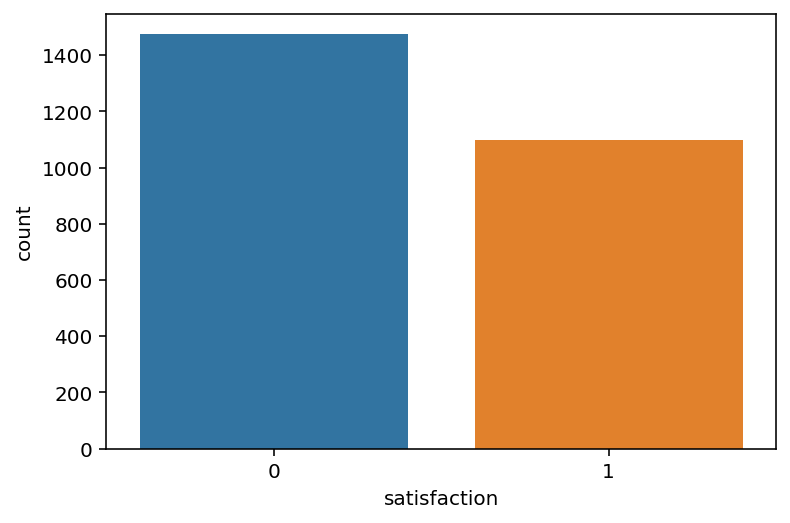

In [37]:
# satisfaction 값 분포
sns.countplot(data['satisfaction'])
plt.show()

- (의견) 제공하는 항공 서비스 중에서 고액 이용자들이 불만을 가질 만한 요소를 찾을 필요가 있다.
- (의견) 불만족이라고 응답한 비율이 높은 것 같다.

7-2) type_of_travel 변수 범주 값  개수를 막대그래프로 시각화해 확인합니다.

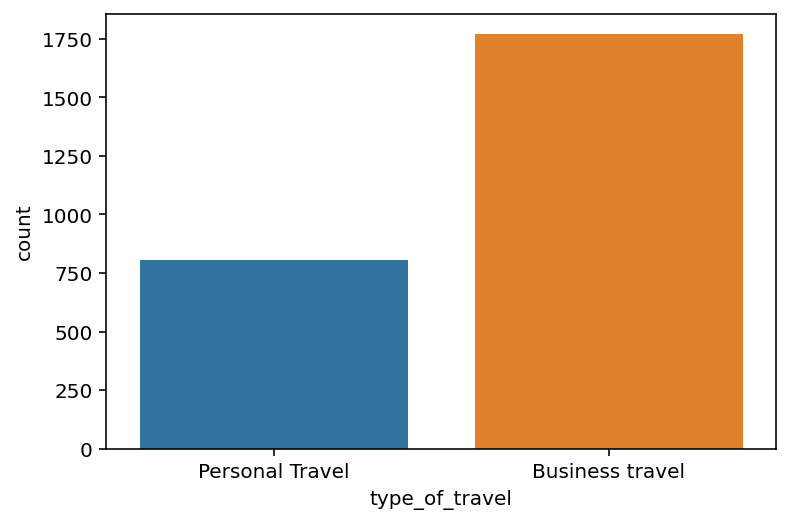

In [38]:
# type_of_travel 값 분포
sns.countplot(data['type_of_travel'])
plt.show()


- (의견) 비즈니스 목적으로 이용하는 사람들은 저렴한 서비스를 이용하니까 불만을 많이 하는 것은 아닐까?
- (의견) 만약 고급형 비즈니스 서비스인데도 불만이 많은 것이면 서비스 개선이나 비즈니스 목표 수정 등 과감한 대책이 필요하다.

7-3) age 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

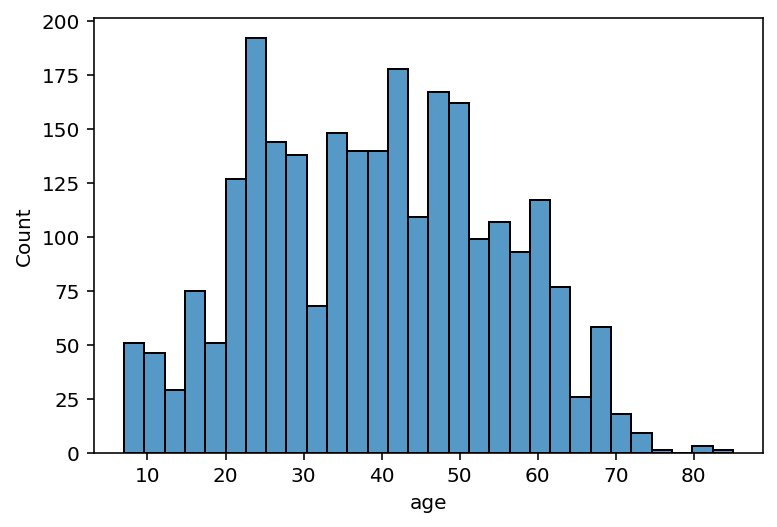

In [39]:
# age 값 분포
sns.histplot(data=data, x='age', bins=30)
plt.show()


- (의견) 20대~40대가 비즈니스 목적으로 이용하고, 그 외의 연령대에서는 다른 목적으로 이용할 수도 있지 않을까?
- (의견) 30대 초반은 유독 표본이 적은데 그 이유가 궁금하다.

# 3.데이터 준비


- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 불필요한 변수 제거**

- 불필요한 변수와 의미가 적어 보이는 다음 변수들을 제거합니다.
    - id, departure/arrival_time_convenient, gate_location, departure_delay_in_minutes

In [40]:
# id 변수 제거
data.drop(['id','departure/arrival_time_convenient','gate_location','departure_delay_in_minutes'], axis=1, inplace=True)


# 확인
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


**2) 결측치 처리**

- arrival_delay_in_minutes 열에 결측지가 있습니다.
- 몇 건 안되니 결측치가 있는 행은 제거합니다.

In [41]:
# 결측치 제거
data.dropna(axis=0, inplace=True)

# 확인
data.isnull().sum()

gender                      0
customer_type               0
age                         0
type_of_travel              0
class                       0
flight_distance             0
inflight_wifi_service       0
ease_of_online_booking      0
food_and_drink              0
online_boarding             0
seat_comfort                0
inflight_entertainment      0
on-board_service            0
leg_room_service            0
baggage_handling            0
checkin_service             0
inflight_service            0
cleanliness                 0
arrival_delay_in_minutes    0
satisfaction                0
dtype: int64

**3) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - gender, customer_type, type_of_travel, class

In [46]:
# 가변수화
data = pd.get_dummies(data, columns=['gender', 'customer_type', 'type_of_travel', 'class'])


# 확인
data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,...,satisfaction,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,3,1,3,1,1,1,5,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,2,2,2,2,2,5,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,4,5,5,3,3,4,...,1,0,1,1,0,1,0,1,0,0


**4) x, y 분리**

- satisfaction 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [47]:
# target 확인
target = 'satisfaction'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**5) 정규화**

- x의 모든 변수를 정규화합니다.

In [49]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

# 확인
x.describe()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,...,arrival_delay_in_minutes,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
count,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,...,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000
mean,0.413340,0.232522,0.546309,0.551437,0.645765,0.648329,0.609946,0.665734,0.672339,0.659751,...,0.032522,0.517094,0.482906,0.821290,0.178710,0.687257,0.312743,0.487956,0.437063,0.074981
std,0.196201,0.206160,0.263478,0.280282,0.268352,0.268510,0.332529,0.266833,0.253211,0.262940,...,0.077238,0.499805,0.499805,0.383184,0.383184,0.463701,0.463701,0.499952,0.496119,0.263411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243590,0.069087,0.400000,0.400000,0.400000,0.400000,0.250000,0.400000,0.400000,0.400000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423077,0.161969,0.600000,0.600000,0.600000,0.600000,0.750000,0.800000,0.800000,0.600000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564103,0.344873,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,...,0.029787,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [50]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

### 4.1.1. 모델링

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [51]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
# (이하 평가용 라이브러리)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [59]:
# 2단계: 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [53]:
# 3단계: 학습하기
model.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [55]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9003880983182406
[[424  19]
 [ 58 272]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       443
           1       0.93      0.82      0.88       330

    accuracy                           0.90       773
   macro avg       0.91      0.89      0.90       773
weighted avg       0.90      0.90      0.90       773



### 4.1.2. 성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [56]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score={}
score['KNN'] = accuracy_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [57]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier


In [60]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [61]:
# 3단계: 학습하기
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2022)

In [62]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [63]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8809831824062095
[[398  45]
 [ 47 283]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       443
           1       0.86      0.86      0.86       330

    accuracy                           0.88       773
   macro avg       0.88      0.88      0.88       773
weighted avg       0.88      0.88      0.88       773



### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [64]:
# 중요도 확인
print(model.feature_importances_)


[3.92594268e-02 4.38975655e-02 1.54397856e-01 2.10941997e-03
 6.05152885e-03 3.42739583e-01 1.74797807e-02 6.18019013e-02
 1.21844111e-02 5.78665912e-03 4.27741900e-03 1.89904949e-02
 1.14120584e-02 2.30228410e-02 1.64546236e-02 2.27966026e-03
 2.26863340e-03 2.78615633e-02 2.45906120e-02 1.60356604e-01
 0.00000000e+00 1.94035021e-02 3.11200524e-04 3.06265509e-03]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

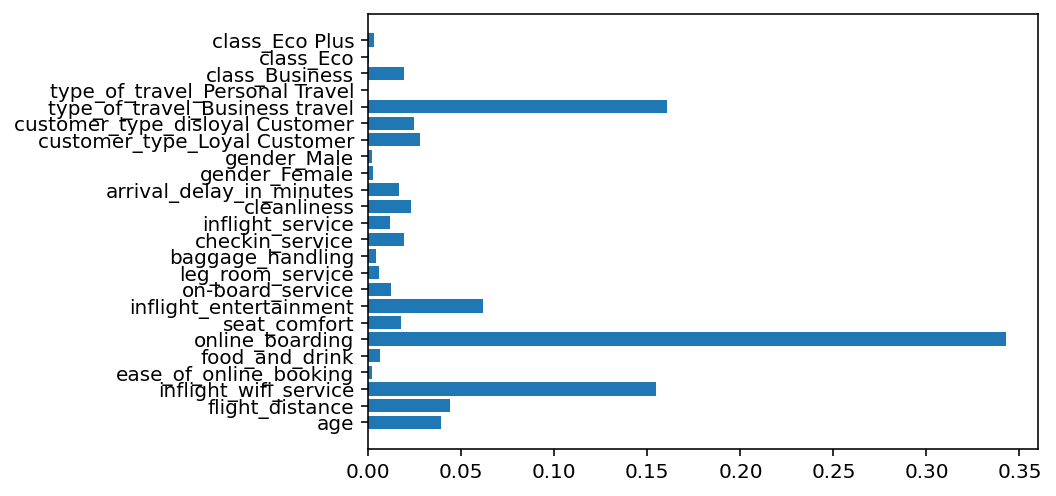

In [65]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()


- (의견) 젊은 사람들이 온라인 서비스를 많이 활용하는 걸 감안하면, 젊은 층이 서비스에 불만족스러워하는 비율이 높을 것 같다.
- (의견) 비즈니스 좌석 이용객이 따라 기내 서비스 수준에 따라 만족도에 민감하게 반응하는지 알아볼 필요가 있다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [66]:
# 성능 정보 수집
score['Decision Tree'] = accuracy_score(y_test, y_pred)

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [67]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier


In [69]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [70]:
# 3단계: 학습하기
model.fit(x_train,y_train)

RandomForestClassifier(random_state=2022)

In [71]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [72]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9236739974126779
[[419  24]
 [ 35 295]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       443
           1       0.92      0.89      0.91       330

    accuracy                           0.92       773
   macro avg       0.92      0.92      0.92       773
weighted avg       0.92      0.92      0.92       773



### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [73]:
# 중요도 확인
print(model.feature_importances_)


[0.04267016 0.05052409 0.1001233  0.0377353  0.01698177 0.14796357
 0.04826429 0.04339561 0.02913141 0.04065067 0.02449491 0.0285756
 0.02224965 0.03366194 0.02173094 0.00596186 0.00580871 0.02681813
 0.02733861 0.05835002 0.07469411 0.06302824 0.04588336 0.00396377]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

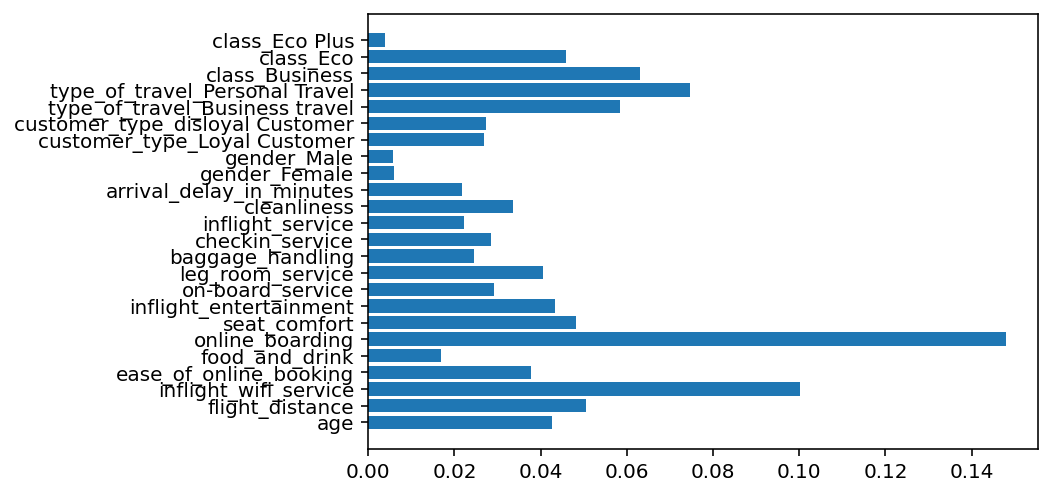

In [74]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()


- (의견) 의사결정나무 모델과 달리 좌석 수준과 여행 목적이 만족도에 큰 상관관계를 준다.
- (의견) 고품질 서비스에 관심이 많은 여행 목적 이용자들이 만족도에 큰 영향을 주는 것 같다.

### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [75]:
# 성능 정보 수집
score['Random Forest'] = accuracy_score(y_test, y_pred)

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [76]:
# 1단계: 불러오기
from xgboost import XGBClassifier


In [77]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [78]:
# 3단계: 학습하기
model.fit(x_train,y_train)

[14:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [80]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9275549805950841
[[419  24]
 [ 32 298]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       443
           1       0.93      0.90      0.91       330

    accuracy                           0.93       773
   macro avg       0.93      0.92      0.93       773
weighted avg       0.93      0.93      0.93       773



### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [82]:
# 중요도 확인
print(model.feature_importances_)


[0.01271769 0.00870186 0.08635558 0.01660112 0.00903725 0.28182772
 0.02763157 0.04797981 0.02047672 0.02035984 0.02359108 0.01985148
 0.00920835 0.02751659 0.01203717 0.0095018  0.         0.07281946
 0.         0.17613226 0.         0.09817535 0.01947731 0.        ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

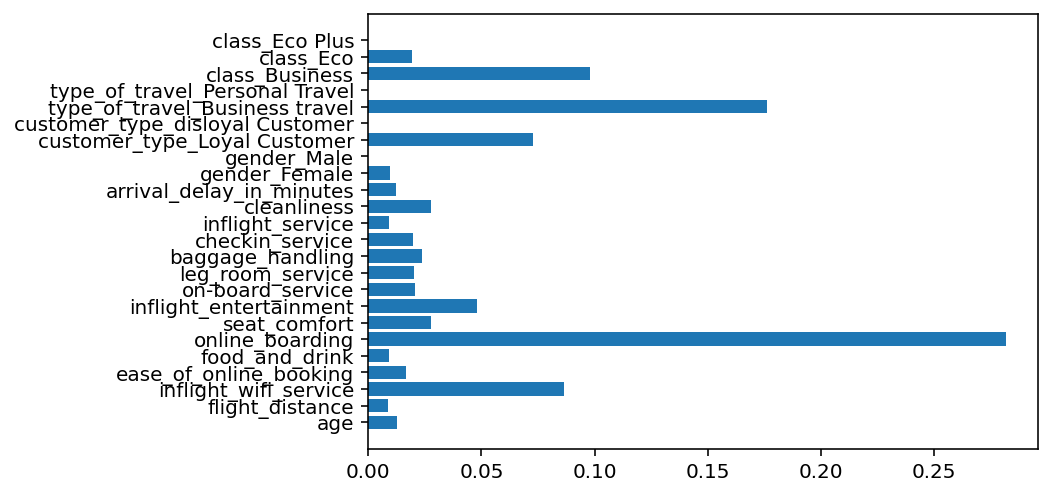

In [83]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()


- (의견) 다른 원인 때문에 기내 서비스에 불만을 갖고, 기내 서비스 불만 때문에 전반적인 만족도가 나빠지는 것 같다.
- (의견) 비즈니스 목적의 이용객이 고가의 프리미엄 서비스를 기대했는데 서비스 품질이 기대보다 나빠서 불만을 가지는 건 아닐까?

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [84]:
# 성능 정보 수집
score['XGBoost'] = accuracy_score(y_test, y_pred)

# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-KNN: 0.9004
-Decision Tree: 0.8810
-Random Forest: 0.9237
-XGBoost: 0.9276


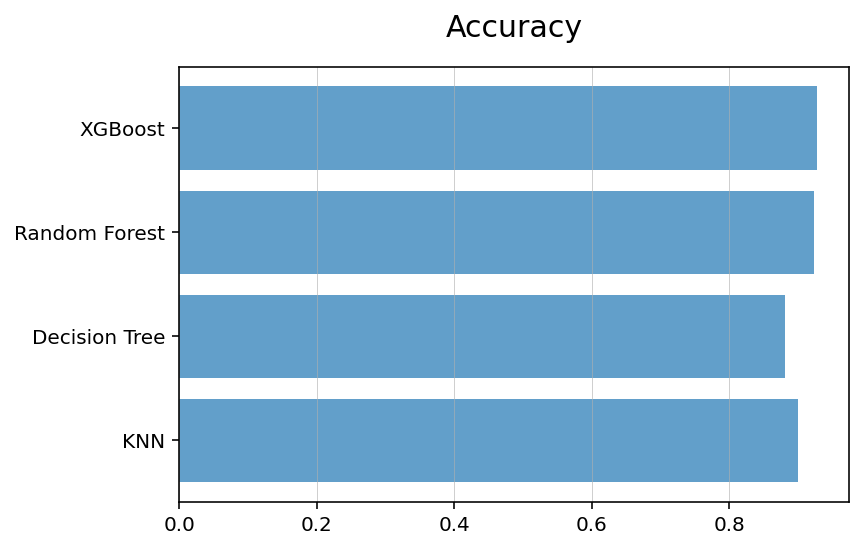

In [85]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시작화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- (의견) 모델 별 정확도에 큰 차이는 없다
- (의견) 여행 목적 별, 특히 비즈니스 목적인 경우 만족도와 큰 상관관계를 보였다.
- (의견) 온라인 보딩을 제외하면 모델마다 중시하는 가중치가 다른 만큼 어떤 점에서 차이를 보였는지 알아볼 필요가 있다.

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

In [155]:
# 필요 라이브러리 불러오기(Randomized)
from sklearn.model_selection import RandomizedSearchCV

# 의사결정나무 튜닝
rm_model = DecisionTreeClassifier(random_state=2022)
rm_params = {'max_depth':range(1,51),'min_samples_leaf':range(1,11),'min_samples_split':range(1,11)}

# 모델 정의
model = RandomizedSearchCV(rm_model, rm_params, cv=10, n_iter=50, scoring='accuracy')

# 모델 학습
model.fit(x_train,y_train)

# 모델 예측 및 평가
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8945615982241953
[[935 114]
 [ 76 677]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1049
           1       0.86      0.90      0.88       753

    accuracy                           0.89      1802
   macro avg       0.89      0.90      0.89      1802
weighted avg       0.90      0.89      0.89      1802



In [156]:
print(model.best_estimator_)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=3, min_samples_split=5,
                       random_state=2022)


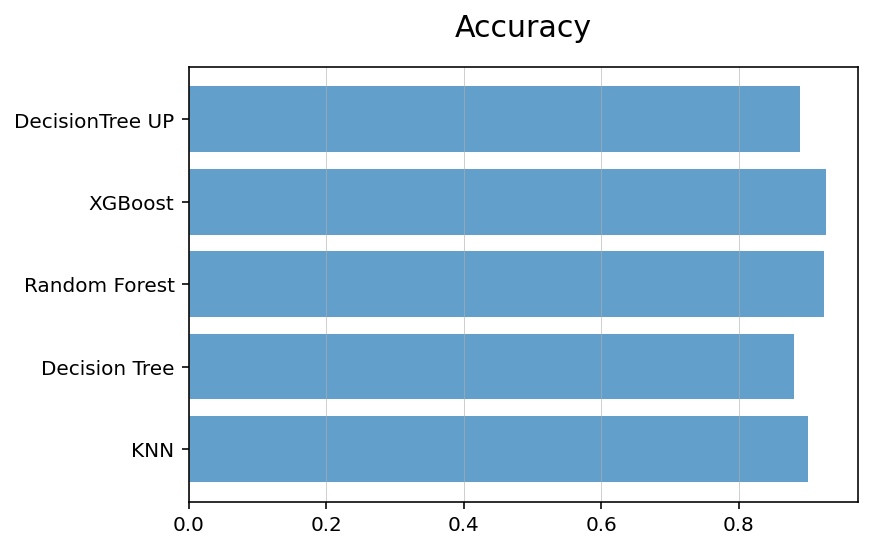

In [90]:
# 성능 정보 추가
score['DecisionTree UP'] = accuracy_score(y_test,y_pred)

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

In [91]:
# 수치화
print(score)

{'KNN': 0.9003880983182406, 'Decision Tree': 0.8809831824062095, 'Random Forest': 0.9236739974126779, 'XGBoost': 0.9275549805950841, 'DecisionTree UP': 0.888745148771022}


- (의견) Decision Tree는 별로 효율적이지 못한 것 같다.
- (의견) 온라인 보딩 이용자와 비즈니스 목적 승객은 확실히 만족도에 민감하게 반응하는 것 같다.
- (의견) 다만 연령별, 좌석등급별로 나눠서 분석해 볼 필요는 있다.